In [1]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Solve optical exciton problem 

In [13]:
Exciton=ExcitonMoS2(epsilon=2.5,N=30,vb=[12,13],cb=[14,15],spin_orbit=True)
Exciton.constuctExcitonHamiltonian(Q=[0,0,0],optic=False)
# Exciton.solveExcitonHamiltonian(save=False)

Exciton Hamiltonian size: 3600X3600
Construction Begin!
Construction Done!


In [14]:
%%time
Exciton.calculateAbsobtionSpectrum(eta=0.01,n_iter=300,omega_n=5000)

CPU times: user 51.5 s, sys: 2.21 s, total: 53.7 s
Wall time: 6.89 s


In [15]:
E,D=np.linalg.eigh(Exciton.HH)

In [16]:
optical=np.zeros(Exciton.NH)
P=np.array([Exciton.dx[indx] for indx in Exciton.indexes])
P/=np.linalg.norm(P)
for i in range(Exciton.NH):
    optical[i]=np.abs(np.sum(P*D[:,i].conj()))**2
omega_max=5;eta=0.02
omega_n=5000
omega=np.linspace(0,omega_max,omega_n+1);omega=np.delete(omega,0)
absorbtion=np.zeros(omega.size,dtype=np.complex)
for i in range(omega.size):
    absorbtion[i]=np.sum(optical/(omega[i]+1j*eta-E))
spectrum=-absorbtion.imag

(1.5, 3.5)

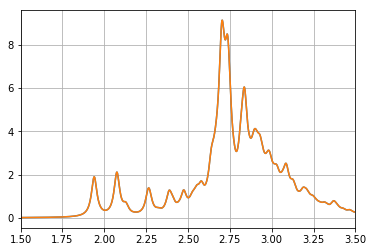

In [17]:

plt.plot(omega,spectrum)
Exciton.plotAbsobtionSpectrum()
plt.xlim([1.5,3.5])

Construction Begin!
Construction Done!


In [11]:
N1=20
gamma=np.array([0.,0.,0.])
M=np.array([0,0.5,0.])
K=np.array([1./3.,1./3.,0.])
kpoints=[];N1=N1;N2=int(N1/2);N3=int(np.sqrt(N1**2+N2**2))
for i in range(N1):
    kpoints.append(i*M/N1+(N1-i)*gamma/N1)
for i in range(N2):
    kpoints.append(i*K/N2+(N2-i)*M/N2)
for i in range(N3):
    kpoints.append(i*gamma/N3+(N3-i)*K/N3)
kpoints=np.array(kpoints)

In [12]:
len(kpoints)

52

In [18]:
E_bands=[]
for q in kpoints:
    Exciton.constuctExcitonHamiltonian(Q=q,optic=False)
    E,D=np.linalg.eigh(Exciton.HH)
    E_bands.append(E)
E_bands=np.array(E_bands)

Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Construction Done!
Construction Begin!
Const

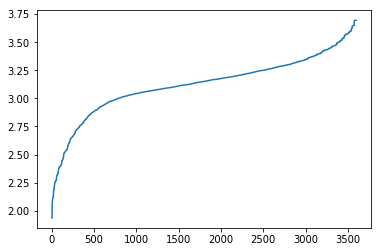

In [21]:
plt.plot(E_bands.T)

In [22]:
E_bands.shape

(3600,)